<a href="https://colab.research.google.com/github/sarannetworkprogammer/Ml_rad/blob/main/Programming_Assignment_3_Saran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please read the documentation for [transforms](https://pytorch.org/vision/0.12/transforms.html) and [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) before starting your programming. 

## **Question 1**: Read the 'transform' documentation and describe as why we are adding the follwoing line:(10 Pts)
***'transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])'***

Answer: ToTensor()  Convert a PIL Image or numpy.ndarray to tensor.

Normalize(mean, std[, inplace]): Normalize a tensor image with mean and standard deviation.

Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using Compose i.e. transforms.compose()

## **Question 2**: What is CIFAR10 dataset, input dimensions, output classes (labels) and size of dataset (10 Pts)


The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

input dimensions = 32 *3 2 *3(becoz of color images)

output_classes = 10

size of dataset = 60 k samples

Trainig size  = 50k samples
Test size  = 10k samples



## **Question 3**: add your training/validation loss figure here and describe why you are encountering underfitting and overfitting issue (10 Pts)

Overfitting: Without dropout, we see that tranining loss decreases , validation loss increases from the graph which indicates that model is overfitted.

Underfitting:

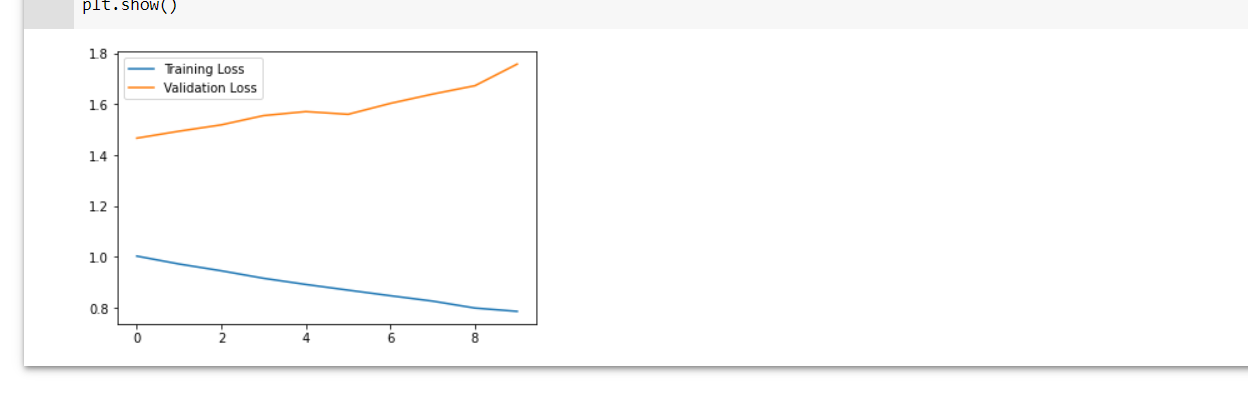



## **Question 4**: update your model to address the underfit and overfit issue and add your new training/validation loss figure here (15 Pts)

After adding drop out, over the time validation loss and training loss merges
attaching graphs in another note book


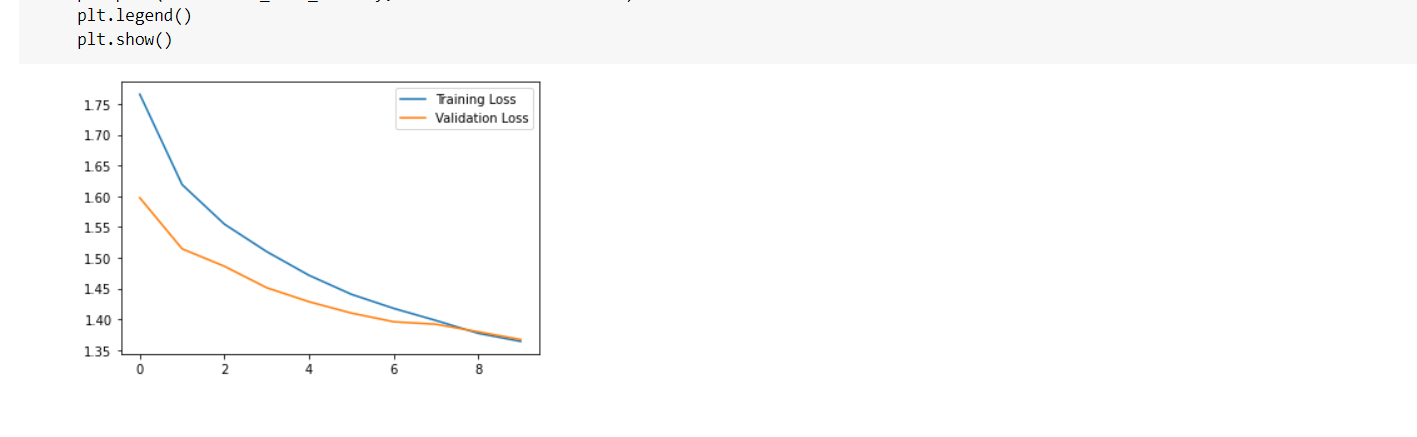









## **Question 5**: update your DataLoader and entire code to incldue k-fold training, valiation, and testing (15 Pts)

Answer: yes updated the model to k-fold


## **Question 6**: change the learning rate to 0.5, 0.1, 0.01,0.001 and retrain the model, describe the result and attached each graph. (20 Pts) 

when learning rate is 0.5 loss decreased so fast as per the graph

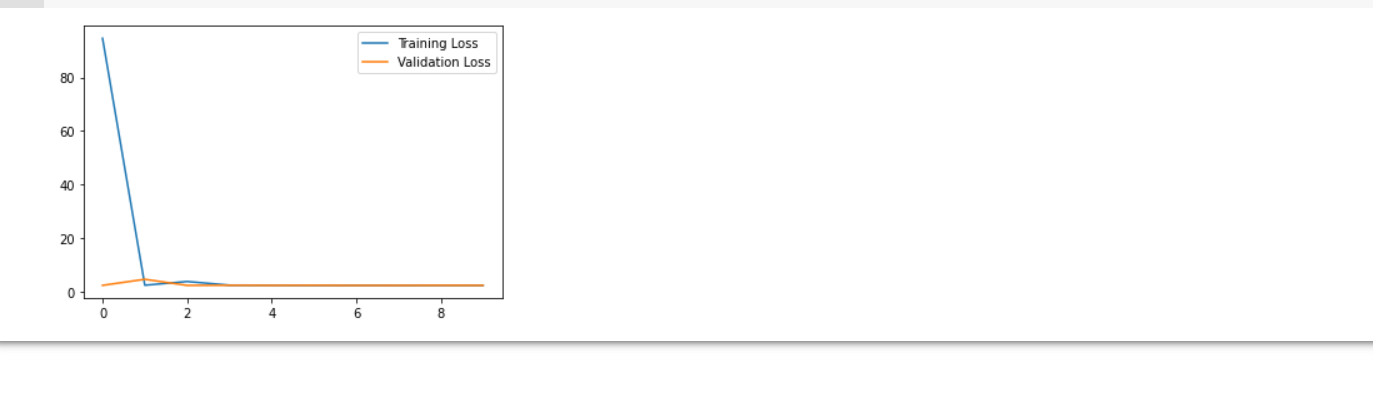






When learning rate is 0.01 it jumps fast at the mininma , as seen in graph


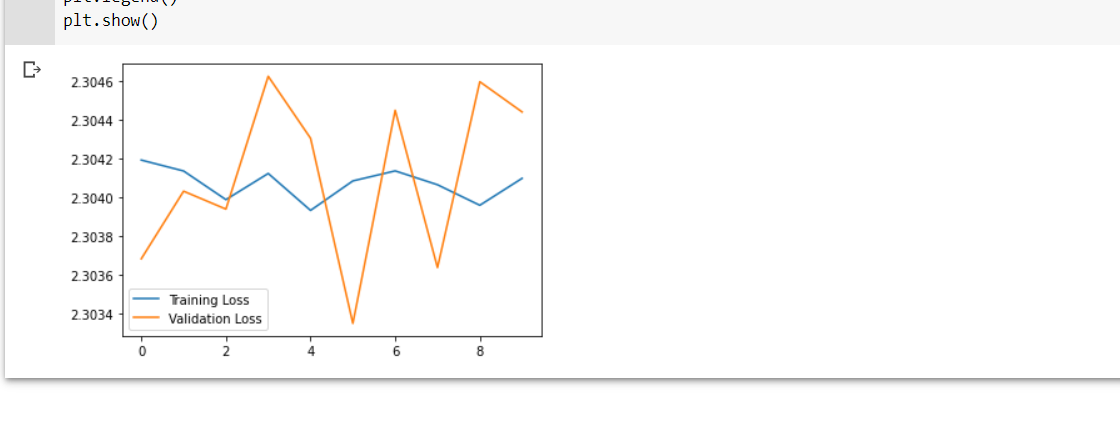



when learning rate = 0.1


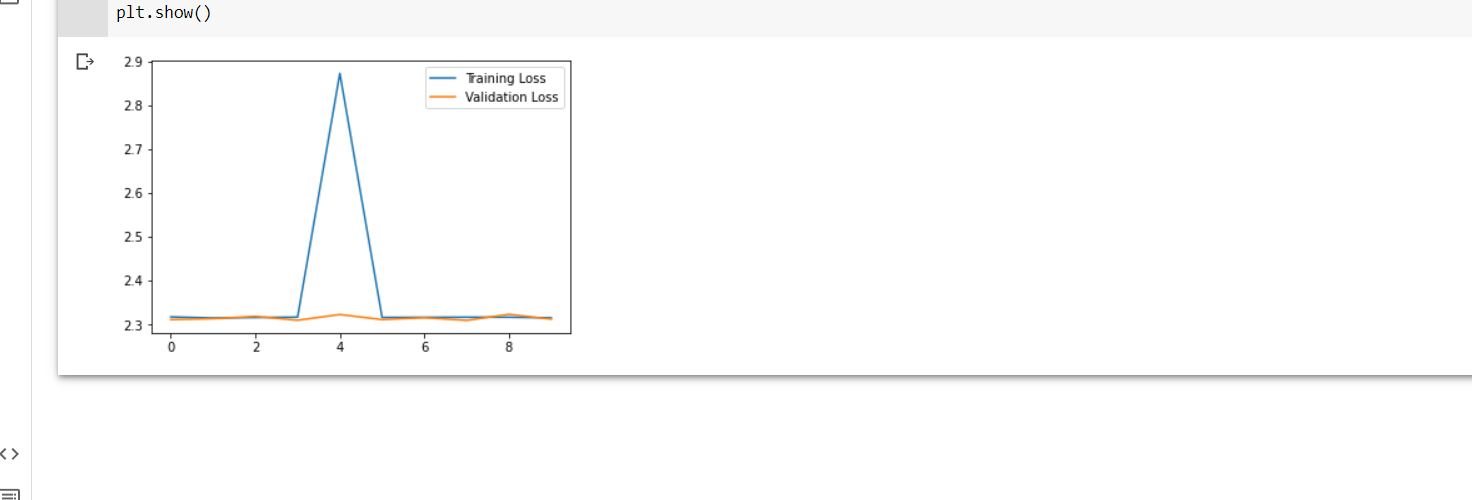



learning rate is how fast each step when the global minima is near we should take  slow steps



## **Question 7**: Define a new model call Net_2 wihtout hidden layer or activation function, what is your observation during training loop and why? (20)


Yes Defined another code block just commented the original block

Validation loss is more than training loss at the end, Training loss increases initially and then drops ,and accuracy is also lower compared to previous model

In Previous training loss decreases at one point time both training and validation loss merges but here in this model it continously overlaps one over the other 






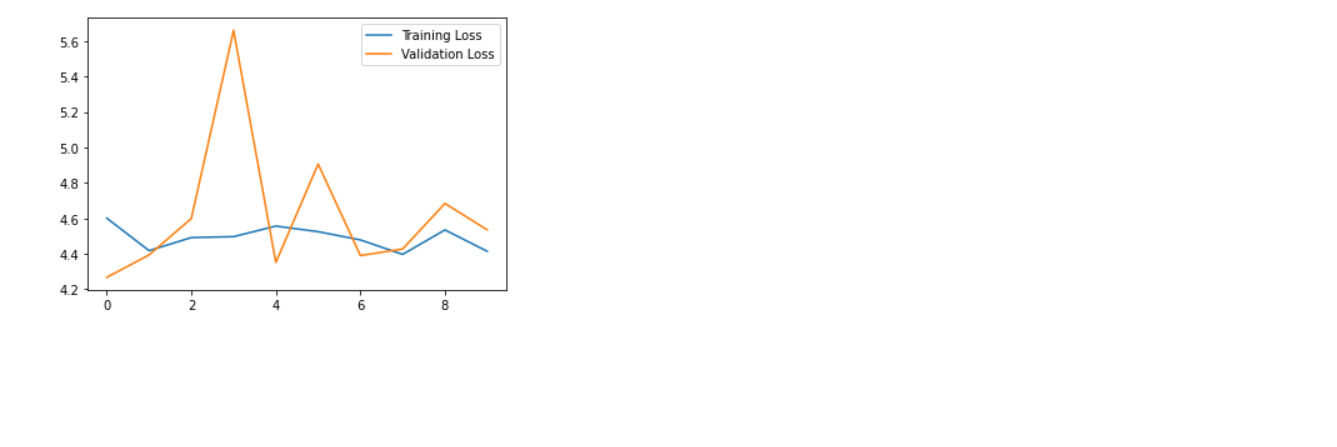

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Training Neural Networks
In Assignment 3 Programming, you will train a neural network using PyTorch.  

This will walk through the entire process, from loading datasets, creating the network code and training it to classify the CIFAR-10 dataset.

In [ ]:
# Import Prebuild Python Packages and Modules 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,ConcatDataset
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

## Loading and *Preprocessing* Data using DataLoader
you will load and preprocess our input and label data using methods from `datasets` and `transforms`.

Then, we will create `DataLoader`s for our train and validation test sets


In [ ]:
# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load train and test CIFAR10 datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
validation_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

dataset = ConcatDataset([training_data, validation_data])


k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)


for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
# Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)



# Create the training and test dataloaders with a batch size of 32
  train_loader = DataLoader(dataset, batch_size=32, sampler=train_subsampler)
  validation_loader = DataLoader(dataset, batch_size=32, sampler=test_subsampler)

In [ ]:
# visualizing the data

examples = iter(validation_loader)

example_data ,example_targets = examples.next()

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(example_data[i][0])

plt.show()

## Defining your Neural Network
Now you are ready to define your model. Since you are using Deep Neural Network architecutre and your input image has three dimentions, first you need to flatten your input into a single input. 

Feel free to experiment here, and if you need additional help, consult the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html)

Add two hidden layers:
- hidden layer 1 = 120 neurons
- hiddel layer 2 = 84 neurons
- use relu ONLY at the end of both hidden layers 


In [ ]:
# Define the class for your neural network in this cell


"""

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ##### add your code here


        input_size = 32*32*3
        hidden_1 =120
        hidden_2 =84
        output_classes =10

        self.linear1 = nn.Linear(input_size, hidden_1)
        self.linear2 = nn.Linear(hidden_1, hidden_2)
        self.linear3 = nn.Linear(hidden_2, output_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        ##### add your code here

          # flatten the image

        x = torch.flatten(x,1)
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.linear3(x)
        return x


# Instantiate the model

net = Net()

"""

In [ ]:


class Net2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear1 = nn.Linear(3072,10)

  
  def forward(self,x):
    x = torch.flatten(x,1)
    x = self.linear1(x)

    return x


net = Net2()


## Optimizer and Loss function
Before you get into our training loop, you need to choose an optimizer and loss function for our network training. 

In [ ]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function 

criterion = nn.CrossEntropyLoss() ##### add your code here

## Creating the Training Loop
With you network, optimizer, and loss function, now you can begin the training step (uptimizing the weight values) 
Using the validation set to validate your accuracy, you can see when our network has given you the best fit and avoid overfit or underfit senarios.

In [ ]:
num_epochs = 10

# Establish a list for your loss history
train_loss_history = list()
validation_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    ## for each data batch 
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        #print(inputs)
        
        #print(labels)

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()


        optimizer.zero_grad()

        outputs = net(inputs)
        #print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    validation_loss = 0.0
    validation_correct = 0
    net.eval()
    for inputs, labels in validation_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        validation_correct += (preds == labels).sum().item()
        validation_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {validation_correct/len(validation_loader):.2f}% validation loss: {validation_loss/len(validation_loader):.5f}')
    validation_loss_history.append(validation_loss/len(validation_loader))

Epoch 1 training accuracy: 13.29% training loss: 2.11672
Epoch 1 validation accuracy: 10.95% validation loss: 2.39943
Epoch 2 training accuracy: 13.51% training loss: 1.88571
Epoch 2 validation accuracy: 11.04% validation loss: 2.29285
Epoch 3 training accuracy: 13.66% training loss: 1.82923
Epoch 3 validation accuracy: 10.52% validation loss: 2.31223
Epoch 4 training accuracy: 13.57% training loss: 1.79837
Epoch 4 validation accuracy: 11.12% validation loss: 2.20424
Epoch 5 training accuracy: 13.64% training loss: 1.77662
Epoch 5 validation accuracy: 11.15% validation loss: 2.15674
Epoch 6 training accuracy: 13.65% training loss: 1.76199
Epoch 6 validation accuracy: 11.07% validation loss: 2.17534
Epoch 7 training accuracy: 13.72% training loss: 1.75221
Epoch 7 validation accuracy: 11.00% validation loss: 2.13713
Epoch 8 training accuracy: 13.68% training loss: 1.74879
Epoch 8 validation accuracy: 11.16% validation loss: 2.11361
Epoch 9 training accuracy: 13.77% training loss: 1.73568

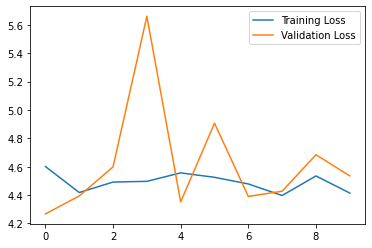

In [ ]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.legend()
plt.show()